# Multi-session analysis
This notebook demonstrate how to combine different xarray dataset together and perform group-level analysis

In [187]:
import xarray as xr
import matplotlib.pylab as plt
import seaborn as sns
from pathlib import Path
import pandas as pd
from tqdm import tqdm
import numpy as np
from glob import glob

In [188]:
import os

dir_path = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\by_sessionsxed\reaching_go_spout_bar_nov22'
file_pattern = 'RE*/processed/xr_session.nc'

# Use os.path.join() to construct the file path
file_path = os.path.join(dir_path, file_pattern)

# Use the updated file path in the glob() function
fns = glob(file_path)

## Loading data

In [189]:
def load_datasets(filenames):
    ds_list=[]
    for f in tqdm(filenames):
        ds = xr.open_dataset(f) 
        ds = ds.drop_dims('time') # for performance reason
        ds_list.append(ds)
        ds.close()
        
    return ds_list

In [190]:
fns

[]

In [191]:
import os
from glob import glob

sessions_to_include = ['RE602-2023-03-20-145614' , 'RE604-2023-03-20-094835' , 'RE604-2023-03-22-120336' , 'RE604-2023-03-23-090342' , 'RE604-2023-03-27-091207']

file_pattern = []
for session in sessions_to_include:
    path = os.path.join(r'\\ettin\Magill_Lab\Julien\Data\head-fixed\by_sessions\reaching_go_spout_bar_nov22', session, 'processed', 'xr_session.nc') + ' '
    file_pattern.append(path)
print(file_pattern)
ds_list = load_datasets(file_pattern)

['\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\by_sessions\\reaching_go_spout_bar_nov22\\RE602-2023-03-20-145614\\processed\\xr_session.nc ', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\by_sessions\\reaching_go_spout_bar_nov22\\RE604-2023-03-20-094835\\processed\\xr_session.nc ', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\by_sessions\\reaching_go_spout_bar_nov22\\RE604-2023-03-22-120336\\processed\\xr_session.nc ', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\by_sessions\\reaching_go_spout_bar_nov22\\RE604-2023-03-23-090342\\processed\\xr_session.nc ', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\by_sessions\\reaching_go_spout_bar_nov22\\RE604-2023-03-27-091207\\processed\\xr_session.nc ']


100%|██████████| 5/5 [00:00<00:00, 17.88it/s]


In [192]:
#import os
#from glob import glob

#sessions_to_include = ['RE602-2023-03-20-145614' , 'RE604-2023-03-20-094835' , 'RE604-2023-03-22-120336' , 'RE604-2023-03-23-090342' , 'RE604-2023-03-24-091134', 'RE604-2023-03-27-091207']

#file_pattern = []
#for session in sessions_to_include:
    #path = os.path.join(r'\\ettin\Magill_Lab\Julien\Data\head-fixed\by_sessions\reaching_go_spout_bar_nov22', session, 'processed', 'xr_session.nc') + ' '
    #file_pattern.append(path)
#print(file_pattern)
#ds_list = load_datasets(file_pattern)

In [193]:
file_pattern

['\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\by_sessions\\reaching_go_spout_bar_nov22\\RE602-2023-03-20-145614\\processed\\xr_session.nc ',
 '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\by_sessions\\reaching_go_spout_bar_nov22\\RE604-2023-03-20-094835\\processed\\xr_session.nc ',
 '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\by_sessions\\reaching_go_spout_bar_nov22\\RE604-2023-03-22-120336\\processed\\xr_session.nc ',
 '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\by_sessions\\reaching_go_spout_bar_nov22\\RE604-2023-03-23-090342\\processed\\xr_session.nc ',
 '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\by_sessions\\reaching_go_spout_bar_nov22\\RE604-2023-03-27-091207\\processed\\xr_session.nc ']

In [194]:
# Combine the dataset together
ds_combined = xr.combine_nested(ds_list,'session_id')

In [195]:
ds_combined

<xarray.Dataset>
Dimensions:                            (trial_nb: 453, event_time: 100,
                                        session_id: 5)
Coordinates:
  * trial_nb                           (trial_nb) int64 1 2 3 4 ... 451 452 453
  * event_time                         (event_time) float64 -1.975e+03 ... 2....
  * session_id                         (session_id) object 'RE602-2023-03-20-...
Data variables: (12/19)
    uid                                (session_id, trial_nb) object 'RE602_2...
    trigger                            (session_id, trial_nb) object 'hold_fo...
    valid                              (session_id, trial_nb) float64 1.0 ......
    break_after_abort                  (session_id, trial_nb) float64 0.0 ......
    US_end_timer                       (session_id, trial_nb) float64 0.0 ......
    water_on                           (session_id, trial_nb) float64 0.0 ......
    ...                                 ...
    waiting_for_spout                  (session_id, trial_nb) float64 1.0 ......
    success                            (session_id, trial_nb) float64 0.0 ......
    hold_for_water_analog_1_df_over_f  (session_id, trial_nb, event_time) float64 ...
    first_bar_off_analog_1_df_over_f   (session_id, trial_nb, event_time) float64 ...
    first_spout_analog_1_df_over_f     (session_id, trial_nb, event_time) float64 ...
    last_bar_off_analog_1_df_over_f    (session_id, trial_nb, event_time) float64 ...

## Plot figures

In [196]:
# Print the dataset
print(ds_combined)

# Print the variable names
print(ds_combined.keys())

<xarray.Dataset>
Dimensions:                            (trial_nb: 453, event_time: 100,
                                        session_id: 5)
Coordinates:
  * trial_nb                           (trial_nb) int64 1 2 3 4 ... 451 452 453
  * event_time                         (event_time) float64 -1.975e+03 ... 2....
  * session_id                         (session_id) object 'RE602-2023-03-20-...
Data variables: (12/19)
    uid                                (session_id, trial_nb) object 'RE602_2...
    trigger                            (session_id, trial_nb) object 'hold_fo...
    valid                              (session_id, trial_nb) float64 1.0 ......
    break_after_abort                  (session_id, trial_nb) float64 0.0 ......
    US_end_timer                       (session_id, trial_nb) float64 0.0 ......
    water_on                           (session_id, trial_nb) float64 0.0 ......
    ...                                 ...
    waiting_for_spout                  (session

In [197]:
total_trials = len(ds_combined['trial_nb'])
print("Total number of trials:", total_trials)
total_successes = len(ds_combined['success'].where(ds_combined['success'] == 1, drop=True))
print("Total number of successes:", total_successes)

Total number of trials: 453
Total number of successes: 5


In [198]:
ds_combined

<xarray.Dataset>
Dimensions:                            (trial_nb: 453, event_time: 100,
                                        session_id: 5)
Coordinates:
  * trial_nb                           (trial_nb) int64 1 2 3 4 ... 451 452 453
  * event_time                         (event_time) float64 -1.975e+03 ... 2....
  * session_id                         (session_id) object 'RE602-2023-03-20-...
Data variables: (12/19)
    uid                                (session_id, trial_nb) object 'RE602_2...
    trigger                            (session_id, trial_nb) object 'hold_fo...
    valid                              (session_id, trial_nb) float64 1.0 ......
    break_after_abort                  (session_id, trial_nb) float64 0.0 ......
    US_end_timer                       (session_id, trial_nb) float64 0.0 ......
    water_on                           (session_id, trial_nb) float64 0.0 ......
    ...                                 ...
    waiting_for_spout                  (session_id, trial_nb) float64 1.0 ......
    success                            (session_id, trial_nb) float64 0.0 ......
    hold_for_water_analog_1_df_over_f  (session_id, trial_nb, event_time) float64 ...
    first_bar_off_analog_1_df_over_f   (session_id, trial_nb, event_time) float64 ...
    first_spout_analog_1_df_over_f     (session_id, trial_nb, event_time) float64 ...
    last_bar_off_analog_1_df_over_f    (session_id, trial_nb, event_time) float64 ...

In [199]:
#x = ds_combined.success.data[1]
#x  = x[~np.isnan(x)]
#print('total number of trial', len(x))
#print('total number of success', x.sum())

In [200]:
 ds_combined.success

<xarray.DataArray 'success' (session_id: 5, trial_nb: 453)>
array([[ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ..., nan, nan, nan],
       [ 1.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan]])
Coordinates:
  * trial_nb    (trial_nb) int64 1 2 3 4 5 6 7 8 ... 447 448 449 450 451 452 453
  * session_id  (session_id) object 'RE602-2023-03-20-145614' ... 'RE604-2023...

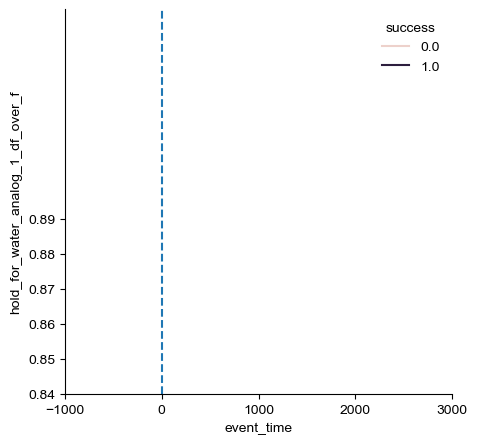

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df2plot = ds_combined[['hold_for_water_analog_1_df_over_f', 'success']].to_dataframe().reset_index()

# Set the size of the figure
plt.figure(figsize=(5, 5))

# Create the line plot
ax = sns.lineplot(x='event_time', hue='success', y='hold_for_water_analog_1_df_over_f', data=df2plot)

# Add a vertical line at x=0
ax.axvline(0, linestyle='--')

# Set the y-axis limits to 0.99 and 1.02
plt.ylim(0.88, 0.95)

# Set the y-axis interval to 0.01
plt.yticks([i/100 for i in range(84,90)])

# Set the x-axis range and interval
plt.xticks(range(-1000, 3500, 1000))
plt.xlim(-1000, 3000)

# Show the plot
plt.show()

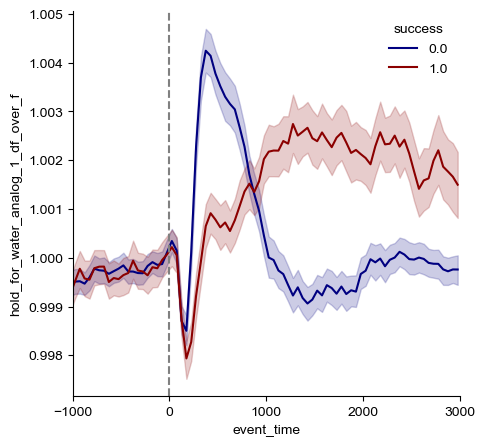

In [202]:
df2plot = ds_combined[['hold_for_water_analog_1_df_over_f', 'success']].to_dataframe().reset_index()

# Set the size of the figure
plt.figure(figsize=(5, 5))

plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams["legend.frameon"] = False
plt.rcParams['font.family'] = ['Arial']

# Create the line plot with custom line colors
ax = sns.lineplot(x='event_time', hue='success', y='hold_for_water_analog_1_df_over_f', data=df2plot,
                  palette=['navy', 'darkred'])

# Add a vertical line at x=0 with grey color
ax.axvline(0, linestyle='--', color='grey')

# Set the x-axis range and interval
plt.xticks(range(-1000, 3500, 1000))
plt.xlim(-1000, 3000)

# Show the plot
plt.show()

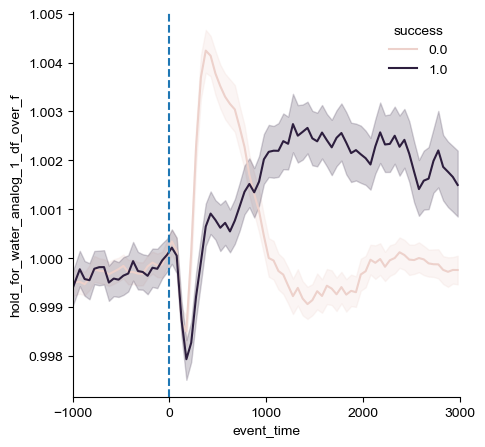

In [203]:
df2plot = ds_combined[['hold_for_water_analog_1_df_over_f', 'success']].to_dataframe().reset_index()

# Set the size of the figure
plt.figure(figsize=(5, 5))

# Create the line plot
ax = sns.lineplot(x='event_time', hue='success', y='hold_for_water_analog_1_df_over_f', data=df2plot)

# Add a vertical line at x=0
ax.axvline(0, linestyle='--')

# Set the x-axis range and interval
plt.xticks(range(-1000, 3500, 1000))
plt.xlim(-1000, 3000)

# Show the plot
plt.show()

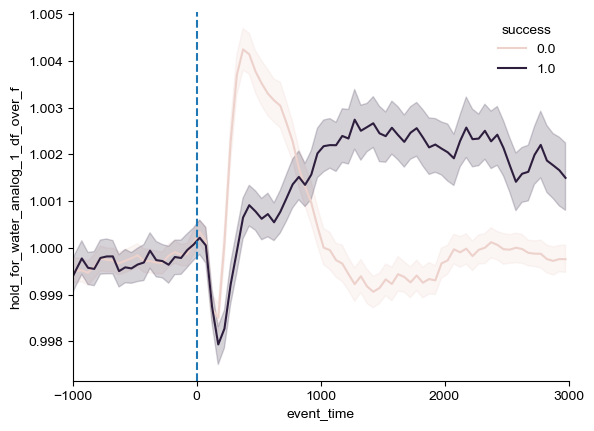

<Figure size 500x500 with 0 Axes>

In [204]:
df2plot = ds_combined[['hold_for_water_analog_1_df_over_f', 'success']].to_dataframe().reset_index()
ax = sns.lineplot(x='event_time',hue='success',
            y='hold_for_water_analog_1_df_over_f', data=df2plot)
ax.axvline(0, linestyle="--")

# Set the x-axis range and interval
plt.xticks(range(-1000, 3500, 1000))
plt.xlim(-1000, 3000)

# Set the size of the figure
plt.figure(figsize=(5, 5))

# Show the plot
plt.show()



In [205]:
df2plot

,session_id,trial_nb,event_time,hold_for_water_analog_1_df_over_f,success
0,RE602-2023-03-20-145614,1,-1975.495099,1.008622,0.0
1,RE602-2023-03-20-145614,1,-1925.485097,1.003594,0.0
2,RE602-2023-03-20-145614,1,-1875.475095,1.003406,0.0
3,RE602-2023-03-20-145614,1,-1825.465093,1.002933,0.0
4,RE602-2023-03-20-145614,1,-1775.455091,1.010186,0.0
...,...,...,...,...,...
226495,RE604-2023-03-27-091207,453,2775.455091,NaN,NaN
226496,RE604-2023-03-27-091207,453,2825.465093,NaN,NaN
226497,RE604-2023-03-27-091207,453,2875.475095,NaN,NaN
226498,RE604-2023-03-27-091207,453,2925.485097,NaN,NaN


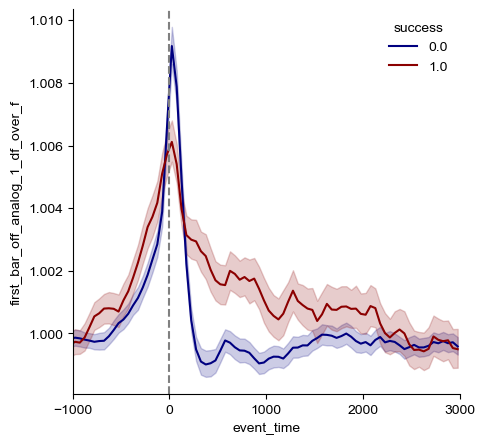

In [206]:
df2plot = ds_combined[['first_bar_off_analog_1_df_over_f', 'success']].to_dataframe().reset_index()

# Set the size of the figure
plt.figure(figsize=(5, 5))

plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams["legend.frameon"] = False
plt.rcParams['font.family'] = ['Arial']

# Create the line plot with custom line colors
ax = sns.lineplot(x='event_time', hue='success', y='first_bar_off_analog_1_df_over_f', data=df2plot,
                  palette=['navy', 'darkred'])

# Add a vertical line at x=0 with grey color
ax.axvline(0, linestyle='--', color='grey')

# Set the x-axis range and interval
plt.xticks(range(-1000, 3500, 1000))
plt.xlim(-1000, 3000)

# Show the plot
plt.show()




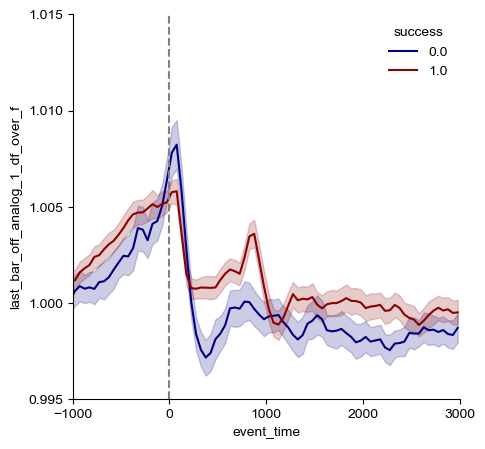

In [207]:
df2plot = ds_combined[['last_bar_off_analog_1_df_over_f', 'success']].to_dataframe().reset_index()

# Set the size of the figure
plt.figure(figsize=(5, 5))

plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams["legend.frameon"] = False
plt.rcParams['font.family'] = ['Arial']

# Create the line plot with custom line colors
ax = sns.lineplot(x='event_time', hue='success', y='last_bar_off_analog_1_df_over_f', data=df2plot,
                  palette=['navy', 'darkred'])

# Add a vertical line at x=0 with grey color
ax.axvline(0, linestyle='--', color='grey')

# Set the x-axis range and interval
plt.xticks(range(-1000, 3500, 1000))
plt.xlim(-1000, 3000)

# Set the y-axis range and interval
plt.yticks([0.995, 1.000, 1.005, 1.010, 1.015])

# Show the plot
plt.show()


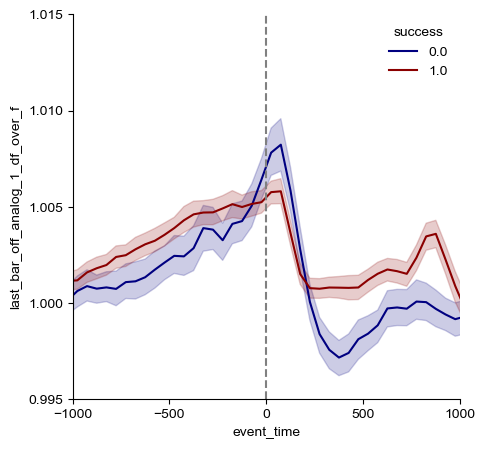

In [214]:
df2plot = ds_combined[['last_bar_off_analog_1_df_over_f', 'success']].to_dataframe().reset_index()

# Set the size of the figure
plt.figure(figsize=(5, 5))

plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams["legend.frameon"] = False
plt.rcParams['font.family'] = ['Arial']

# Create the line plot with custom line colors
ax = sns.lineplot(x='event_time', hue='success', y='last_bar_off_analog_1_df_over_f', data=df2plot,
                  palette=['navy', 'darkred'])

# Add a vertical line at x=0 with grey color
ax.axvline(0, linestyle='--', color='grey')

# Set the x-axis range and interval
plt.xticks([-1000 , -500 , 0, 500 , 1000])

# Set the y-axis range and interval
plt.xlim(-1000, 1000)
plt.yticks([0.995, 1.000, 1.005, 1.010, 1.015])

# Show the plot
plt.show()

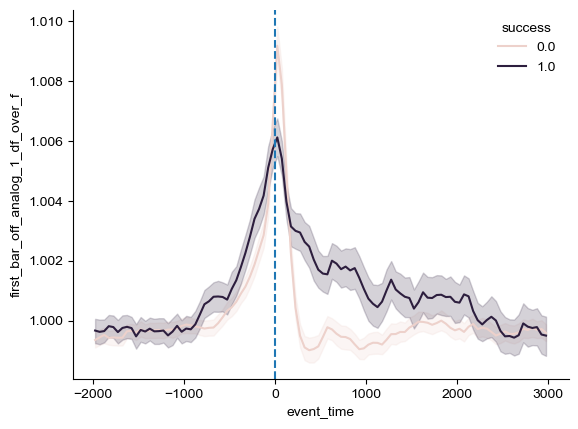

In [208]:
df2plot = ds_combined[['first_bar_off_analog_1_df_over_f', 'success']].to_dataframe().reset_index()
ax = sns.lineplot(x='event_time',hue='success',
            y='first_bar_off_analog_1_df_over_f', data=df2plot)
ax.axvline(0, linestyle="--")


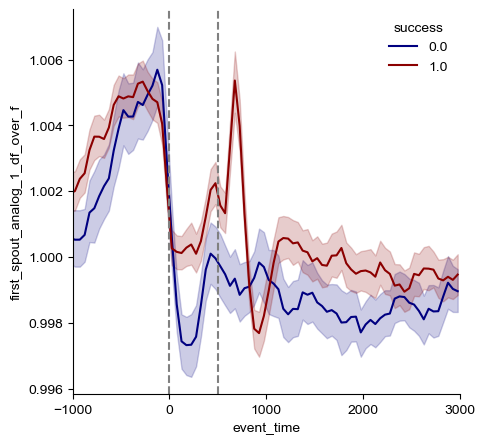

In [209]:
df2plot = ds_combined[['first_spout_analog_1_df_over_f', 'success']].to_dataframe().reset_index()

# Set the size of the figure
plt.figure(figsize=(5, 5))

plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams["legend.frameon"] = False
plt.rcParams['font.family'] = ['Arial']

# Create the line plot with custom line colors
ax = sns.lineplot(x='event_time', hue='success', y='first_spout_analog_1_df_over_f', data=df2plot,
                  palette=['navy', 'darkred'])

# Add a vertical line at x=0 with grey color
ax.axvline(0, linestyle='--', color='grey')
ax.axvline(500, linestyle='--', color='grey')

# Set the x-axis range and interval
plt.xticks(range(-1000, 3500, 1000))
plt.xlim(-1000, 3000)

# Show the plot
plt.show()

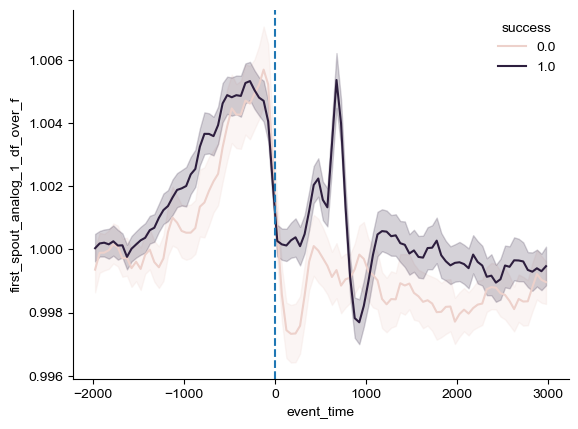

In [210]:
df2plot = ds_combined[['first_spout_analog_1_df_over_f', 'success']].to_dataframe().reset_index()
ax = sns.lineplot(x='event_time',hue='success',
            y='first_spout_analog_1_df_over_f', data=df2plot)

ax.axvline(0, linestyle="--")


In [211]:
df2plot = ds_combined[['timer_delay_analog_1_df_over_f', 'success']].to_dataframe().reset_index()

# Set the size of the figure
plt.figure(figsize=(5, 5))

# Create the line plot
ax = sns.lineplot(x='event_time', hue='success', y='timer_delay_analog_1_df_over_f', data=df2plot)

# Add a vertical line at x=0
ax.axvline(0, linestyle='--')

# Set the x-axis range and interval
plt.xticks(range(-1000, 3500, 1000))
plt.xlim(-1000, 3000)

# Show the plot
plt.show()

KeyError: 'timer_delay_analog_1_df_over_f'

### ACh

In [ ]:
fns = glob(r'Z:/Teris/ASAP/expt_sessions/RE604*/processed/xr_session.nc')
ds_list = load_datasets(fns)
ds_ach_combined = xr.combine_nested(ds_list,'session_id')

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(4*3,3))

df2plot = ds_ach_combined[['hold_for_water_analog_1_df_over_f', 'success']].to_dataframe().reset_index()
sns.lineplot(x='event_time',hue='success',
            y='hold_for_water_analog_1_df_over_f', data=df2plot, ax=ax[0])


df2plot = ds_ach_combined[['first_bar_off_analog_1_df_over_f', 'success']].to_dataframe().reset_index()
sns.lineplot(x='event_time',hue='success',
            y='first_bar_off_analog_1_df_over_f', data=df2plot, ax=ax[1])


df2plot = ds_ach_combined[['first_spout_analog_1_df_over_f', 'success']].to_dataframe().reset_index()
sns.lineplot(x='event_time',hue='success',
            y='first_spout_analog_1_df_over_f', data=df2plot, ax=ax[2])

fig.tight_layout()
